# Low Pass Filter

In [7]:
import pandas as pd
import seaborn as sns
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
coordinates = pd.read_csv('3d_coordinates.csv')
coordinates = coordinates.rename(columns={'Unnamed: 0':'frames'}).drop(['frames'], axis=1)

In [9]:
def low_pass_filter(coord):

    #Filter requirements
    T = len(coord)/200 # video time
    fps = 200 # frame per rate
    cutoff = 8 # desired cutoff frequency of the filter
    nyq = 0.5 * fps # Nyquist Frequency
    order = 2 # sin wave can be approx represented as quadratic
    normal_cutoff = cutoff / nyq

    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y=np.zeros(coord.shape)*float('NaN')
    y[~np.isnan(coord)] = filtfilt(b, a, coord[~np.isnan(coord)])
    return y

In [10]:
""" Low-pass filter """
bodypart = coordinates[coordinates['bodypart'] == 'wrist']
bodypart_coord = bodypart['x']
y = low_pass_filter(bodypart_coord)
low_pass_bodypart = pd.DataFrame(y, columns = ['x'])
low_pass_bodypart['frame'] = low_pass_bodypart.index

<AxesSubplot:xlabel='frame', ylabel='x'>

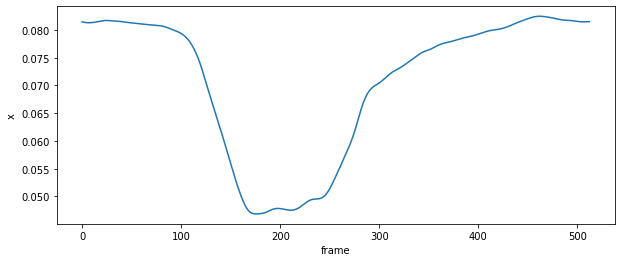

In [12]:
# With Low Pass Filter
plt.figure(figsize=(10, 4))
sns.lineplot(data=low_pass_bodypart, x=low_pass_bodypart['frame'], y=low_pass_bodypart['x'])

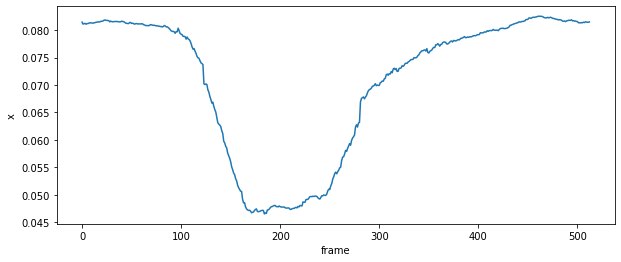

In [17]:
# Without Low Pass Filter
plt.figure(figsize=(10, 4))
z = sns.lineplot(data=bodypart, x=bodypart['frame'], y=bodypart['x'])